# **\[PINKOCTO\]** 퓨리에변환4jy

신록예찬  
2023-06-23

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 회귀모형 (1)

In [136]:
x = np.linspace(-10,10,1000)
x0 = x*0+1
x1 = x 
beta0 = 3 
beta1 = 2
y = x0*beta0+x1*beta1+np.random.randn(1000)

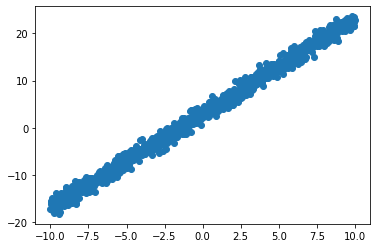

In [137]:
plt.plot(x,y,'o')

# 회귀모형 (2)

`-` 관측한자료

In [570]:
N=1000
x=np.linspace(0,1,N)
eps = np.random.randn(N)
X0 = np.sin(x*0*np.pi)
X1 = np.sin(x*2*np.pi)
X2 = np.sin(x*4*np.pi)
X3 = np.sin(x*6*np.pi)

y=2*X1+1*X2+3*X3+eps

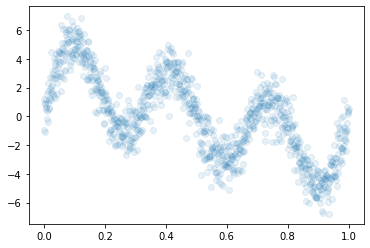

In [571]:
plt.plot(x,y,'o',alpha=0.1)

-   observed signal

`-` 위의 자료를 해석하는 방법

In [572]:
def spec(y):
    N= len(y)
    return abs(np.fft.fft(y)/N)*2 

In [573]:
y=2*X1+1*X2+3*X3+eps
yfft =spec(y) 
y1=2*X1
y2=1*X2
y3=3*X3
yfft1=spec(y1)
yfft2=spec(y2)
yfft3=spec(y3)
epsfft=spec(eps)

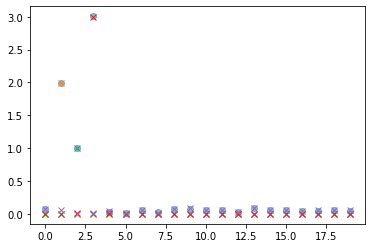

In [574]:
plt.plot(yfft[:20],'o',alpha=0.5)
plt.plot(yfft1[:20],'x',alpha=1,)
plt.plot(yfft2[:20],'x',alpha=1)
plt.plot(yfft3[:20],'x',alpha=1)
plt.plot(epsfft[:20],'x',alpha=1)

`-` 퓨리에변환 -\> threshold -\> 역퓨리에변환을 이용한 스킬

In [575]:
yfft=np.fft.fft(y)

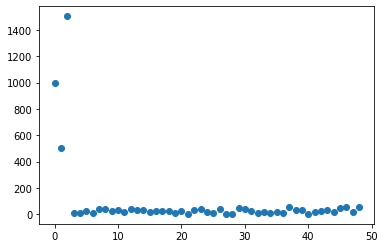

In [576]:
plt.plot(abs(yfft[1:50]),'o')

In [577]:
yfft[abs(yfft)<100] = 0

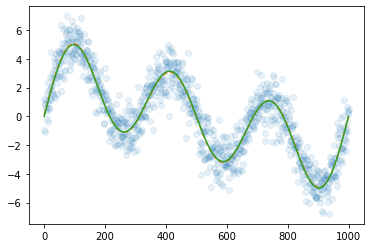

In [579]:
plt.plot(y,'o',alpha=0.1)
yhat=np.fft.ifft(yfft)
plt.plot(yhat,'--')
plt.plot(y-eps,'-')

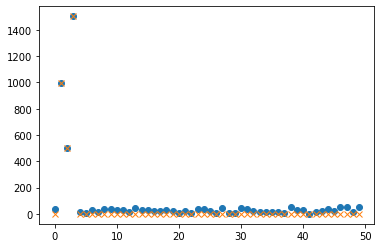

In [580]:
plt.plot(spec2(y)[:50],'o')
plt.plot(spec2(yhat)[:50],'x')

# 삼성전자 주가자료를 스무딩해보기

`-` 삼성전자 자료

In [581]:
import yfinance as yf

In [582]:
start_date = "2023-01-01"
end_date = "2023-05-02"
y = yf.download("005930.KS", start=start_date, end=end_date)['Adj Close'].to_numpy()

[*********************100%***********************]  1 of 1 completed

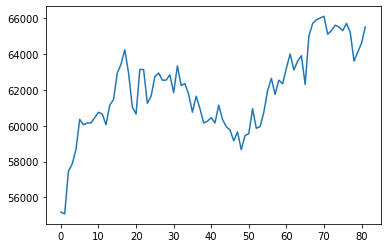

In [583]:
plt.plot(y)

`-` 스펙트럼

In [587]:
yfft = np.fft.fft(y)

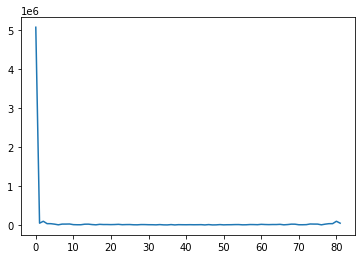

In [591]:
plt.plot(abs(yfft))

`-` 처음 50개정도만 관찰

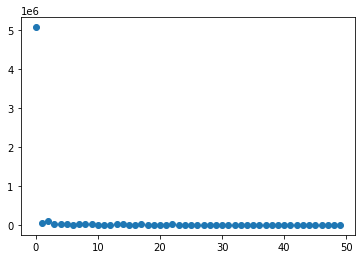

In [592]:
plt.plot(abs(yfft[:50]),'o')

-   첫값이 너무커서 나머지는 잘안보임

`-` 2번째부터 50번째까지만 관찰

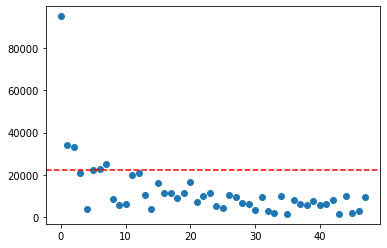

In [597]:
plt.plot(abs(yfft)[2:50],'o')
plt.axhline(y=22500, color='r', linestyle='--')

-   대충 이정도 짜르면 될것같음

`-` thresholded value

In [598]:
tresh_value = 22500

In [599]:
yfft[abs(yfft)<tresh_value] =0 

`-` 퓨리에역변환

In [600]:
yhat = np.fft.ifft(yfft)
yhat[:5]

실수화

In [601]:
yhat = np.real(yhat)
yhat[:5]

`-` 적합결과 시각화

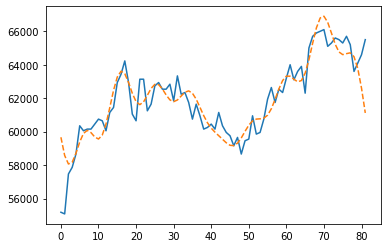

In [602]:
plt.plot(y)
plt.plot(yhat,'--')

`-` 숙제: treshold value를 관찰하며 시각화해볼것

# minor topics

`-` y의 FFT 결과는 항상 y와 같은길이임

In [603]:
len(y)

In [604]:
len(np.fft.fft(y))

`-` 에일리어싱: number of observation은 얼마나 세밀한 주파수까지
측정가능하냐를 결정함

**예시1**: 에일리어싱

In [551]:
x = np.linspace(-3.14,3.14,10)

In [552]:
x1 = np.sin(8*x)
x2 = np.sin(10*x)

In [553]:
np.corrcoef([x1,x2])

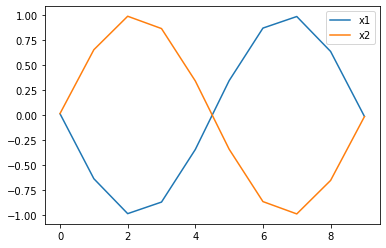

In [554]:
plt.plot(x1,label='x1')
plt.plot(x2,label='x2')
plt.legend()

-   실제로는 x2가 더 고주파인데, 같은 주파수처럼 보임

**예시2**: 에일리어싱이 없는 경우

In [555]:
x = np.linspace(-3.14,3.14,100000)

In [559]:
x1 = np.sin(8*x)
x2 = np.sin(10*x)

In [560]:
np.corrcoef([x1,x2])

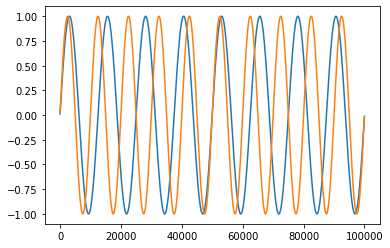

In [561]:
plt.plot(x1)
plt.plot(x2)

-   주파수 왜곡떄문에 실제로는 corr ceof = 0 일지라도 관측되는건 corr
    coef \>0 일 수 있음